In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [7]:
print(classLabels)

['Person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean(127.5) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001E2F5FAE050>

# Reading an image

In [72]:
img = cv2.imread('car and man.jpg')
img_2 = cv2.imread('Wahaha.jpg')
img_3 = cv2.imread('imgmd.jpg')

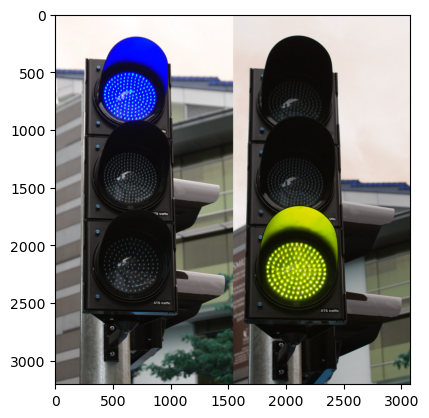

In [73]:
plt.imshow(img_2)

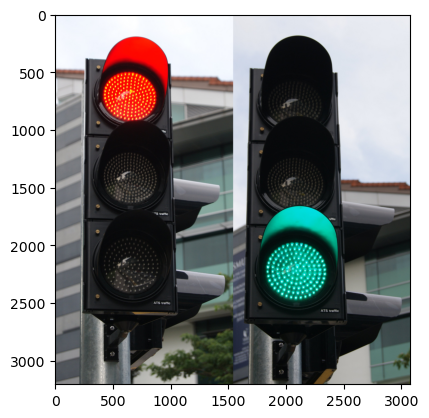

In [74]:
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

In [75]:
ClassIndex, confidence, bbox = model.detect(img_2,confThreshold = 0.5)

In [76]:
print(ClassIndex)

[10 10]


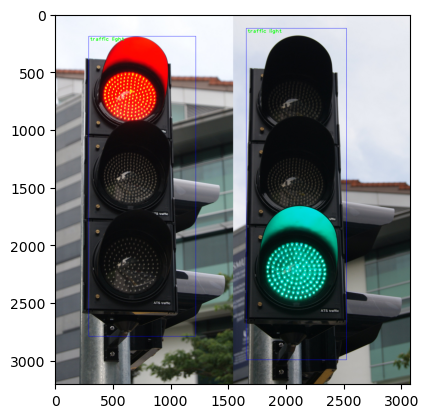

In [77]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img_2,boxes,(255,0,0), 2)
    cv2.putText(img_2,classLabels[ClassInd - 1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness = 3)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

# For Video

In [81]:
cap = cv2.VideoCapture("WhatsApp Video 2022-05-25 at 11.43.02 AM.mp4")

# Checking if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open this video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd - 1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness = 3)
                
                
    cv2.imshow('Ola hu uber',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q') :
        break
        
cap.release()
cv2.destroyAllWindows()

                

[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]


KeyboardInterrupt: 